# Homework 2 Programming Problem 4 (5 points)

In this problem you will perform cubic least squares regression using gradient descent. Starting with an initial guess, you will plot the regression curve as you perform many iterations of gradient descent, and observe how the regression performance improves.

Start by running the following cell to load data and define helpful functions.
Data is loaded into 'x' and 'y', with a cubic design matrix as 'X'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_regression(x_data, y_data, x_reg, y_reg, title=""):
    plt.figure()

    plt.scatter(x_data.flatten(), y_data.flatten(), label="Data", c="black")
    plt.plot(x_reg.flatten(), y_reg.flatten(), label="Fit")

    plt.legend()
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$y$")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.title(title)
    plt.show()

x = np.array([-1.52362349, -1.60576489, -1.34827768, -1.45340266, -1.42652973, -1.20489448, -1.34662672, -0.77989399, -1.02479866, -1.18388425,-0.63601103, -1.06184469, -0.81853545, -0.98253754, -0.41599291,-0.39373095, -0.49828026, -0.50820654, -0.33545205, -0.17745781,-0.11232523, -0.1065807 , -0.28129177, -0.27996129, -0.30355288,0.32030413, -0.10195465,  0.44533511,  0.43274828,  0.35343658,0.10612364,  0.22594603,  0.72121097,  0.81574553,  0.50008731, 0.61311114,  0.65468014,  0.60571755,  0.67438719,  0.67226667, 0.82554208,  0.99744723,  1.04085817,  1.26282573,  1.14517384, 1.22017733,  1.28481911,  1.29034024,  1.66304968,  1.49217068])
y = np.array([ 1.65517515,  1.33249684,  1.38328432,  1.1531808 ,  0.89478436,0.66783182,  0.59841012,  0.64060691,  0.73930904,  0.91751879,0.52952715,  0.30183071,  0.31052792,  0.3684916 ,  0.6584406 , 0.72407787,  0.83710857,  0.74432213,  0.80478856,  0.6755436 ,0.47643214,  0.50833171,  0.7731494 ,  0.60172717,  0.39123432, 0.69418038,  0.59625493,  0.90711162,  1.01760262,  0.98348453, 0.78208567,  0.76030704,  0.55105897,  0.7830408 ,  0.86284938, 0.88284709,  0.35630757,  0.7237893 ,  0.66325283,  0.23944077,-0.04822037,  0.16059611, -0.14460941, -0.38449511, -0.54652704, -0.85011695, -0.84597649, -0.90989068, -1.06840649, -1.77916364])
X = np.vstack([x*x*x, x*x, x, np.ones_like(x)]).T

xreg = np.linspace(-2,2)
Xreg = np.vstack([xreg*xreg*xreg, xreg*xreg, xreg, np.ones_like(xreg)]).T

## Gradient function
We need to define a function for the gradient of our objective function. In the lecture, this gradient was:
$$\frac{\partial \text{obj}}{\partial w} = 2X' (X w - y)$$

Please complete the function below to compute the gradient. Recall that the design matrix is the global variable X, and you may need to reshape the output y as a column vector.

In [2]:
def grad(w):
    # YOUR CODE GOES HERE
    # Return the gradient of the objective function
    # grad_ = ...
    grad_ = 2 * np.dot(X.T, np.dot(X, w) - y.reshape(-1,1))
    return grad_

## Initial guess
Let's define an initial guess for w and visualize the resulting curve:


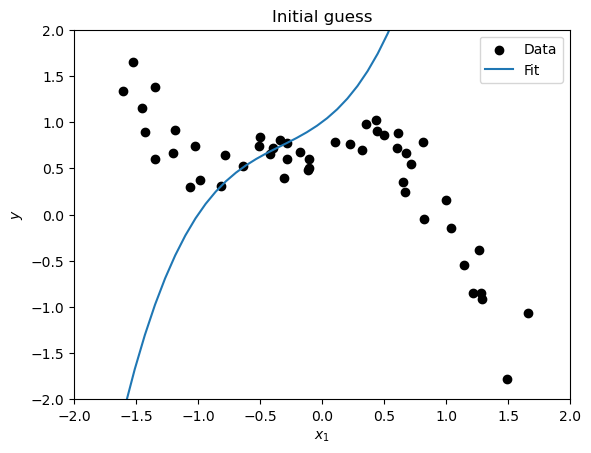

In [3]:
w = np.array([[1,1,1,1]]).T
yreg = Xreg @ w
plot_data_with_regression(x,y,xreg, yreg, "Initial guess")

# Gradient Descent Loop
Now complete the gradient descent loop below. You should call your gradient function, update w by subtracting eta (the step size) times the gradient.

Every several iterations, the result is plotted. You should observe the gradual improvement of the model.

[[0.8912176 ]
 [0.95969607]
 [0.93878673]
 [0.96822971]]


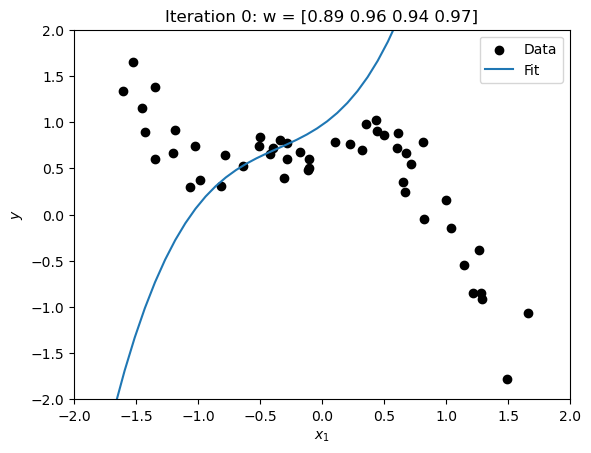

[[0.79087335]
 [0.92066102]
 [0.88226827]
 [0.93784513]]
[[0.69830257]
 [0.88287873]
 [0.83007745]
 [0.90880406]]
[[0.61289339]
 [0.84633026]
 [0.78187614]
 [0.88106422]]
[[0.5340826 ]
 [0.81099427]
 [0.73735296]
 [0.85458341]]
[[0.4613517 ]
 [0.77684743]
 [0.69622114]
 [0.82931971]]
[[0.39422338]
 [0.74386471]
 [0.65821657]
 [0.80523156]]
[[0.33225817]
 [0.71201976]
 [0.62309598]
 [0.78227794]]
[[0.27505146]
 [0.6812851 ]
 [0.59063529]
 [0.76041838]]
[[0.22223072]
 [0.65163245]
 [0.56062807]
 [0.73961313]]
[[0.17345291]
 [0.62303287]
 [0.53288415]
 [0.71982319]]
[[0.12840214]
 [0.595457  ]
 [0.50722834]
 [0.70101037]]
[[0.08678751]
 [0.56887522]
 [0.48349921]
 [0.68313735]]
[[0.04834114]
 [0.54325779]
 [0.46154802]
 [0.6661677 ]]
[[0.01281628]
 [0.51857497]
 [0.44123769]
 [0.65006594]]
[[-0.02001432]
 [ 0.49479716]
 [ 0.4224419 ]
 [ 0.63479753]]
[[-0.05036   ]
 [ 0.471895  ]
 [ 0.40504423]
 [ 0.62032892]]
[[-0.07841358]
 [ 0.44983943]
 [ 0.38893736]
 [ 0.60662752]]
[[-0.10435271]
 [ 0

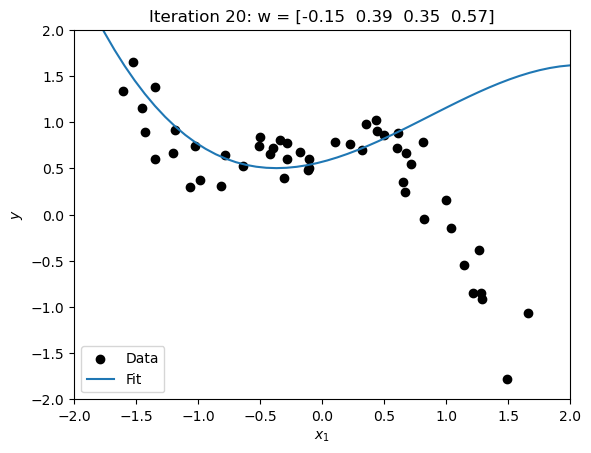

[[-0.17105664]
 [ 0.3695168 ]
 [ 0.33555178]
 [ 0.55887716]]
[[-0.19005088]
 [ 0.35127398]
 [ 0.32456078]
 [ 0.54855775]]
[[-0.20763009]
 [ 0.33371347]
 [ 0.31437144]
 [ 0.53883075]]
[[-0.22390302]
 [ 0.31680997]
 [ 0.30492296]
 [ 0.52967039]]
[[-0.23896989]
 [ 0.30053884]
 [ 0.29615925]
 [ 0.52105185]]
[[-0.2529231 ]
 [ 0.28487609]
 [ 0.28802857]
 [ 0.5129512 ]]
[[-0.26584784]
 [ 0.26979843]
 [ 0.28048318]
 [ 0.50534538]]
[[-0.27782262]
 [ 0.25528325]
 [ 0.27347902]
 [ 0.49821224]]
[[-0.28891986]
 [ 0.24130865]
 [ 0.26697546]
 [ 0.49153044]]
[[-0.29920633]
 [ 0.2278534 ]
 [ 0.26093496]
 [ 0.48527949]]
[[-0.30874358]
 [ 0.21489696]
 [ 0.25532291]
 [ 0.47943968]]
[[-0.31758843]
 [ 0.20241947]
 [ 0.25010733]
 [ 0.47399212]]
[[-0.32579325]
 [ 0.19040174]
 [ 0.2452587 ]
 [ 0.46891863]]
[[-0.33340635]
 [ 0.17882525]
 [ 0.24074979]
 [ 0.46420179]]
[[-0.34047234]
 [ 0.16767213]
 [ 0.2365554 ]
 [ 0.4598249 ]]
[[-0.34703234]
 [ 0.15692514]
 [ 0.23265231]
 [ 0.45577191]]
[[-0.35312431]
 [ 0.1465

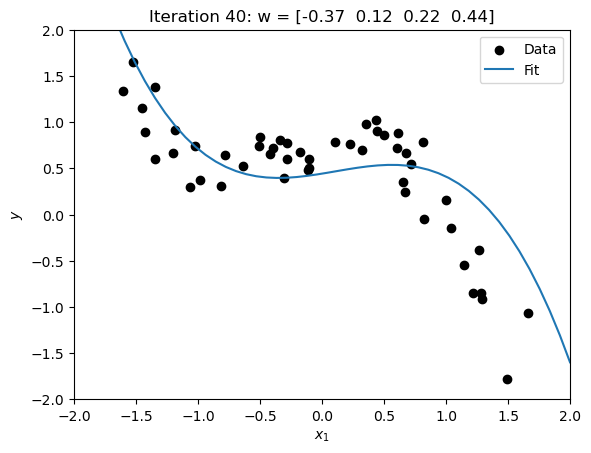

[[-0.37347346]
 [ 0.1087222 ]
 [ 0.2168091 ]
 [ 0.43985017]]
[[-0.37769996]
 [ 0.10008426]
 [ 0.21425571]
 [ 0.43743985]]
[[-0.38163218]
 [ 0.09174855]
 [ 0.21187348]
 [ 0.43525865]]
[[-0.38529182]
 [ 0.08370247]
 [ 0.20965005]
 [ 0.43329528]]
[[-0.38869894]
 [ 0.07593386]
 [ 0.20757395]
 [ 0.4315389 ]]
[[-0.39187206]
 [ 0.0684311 ]
 [ 0.20563459]
 [ 0.42997918]]
[[-0.3948283 ]
 [ 0.06118301]
 [ 0.20382219]
 [ 0.42860623]]
[[-0.39758348]
 [ 0.05417889]
 [ 0.20212766]
 [ 0.42741061]]
[[-0.40015223]
 [ 0.04740845]
 [ 0.20054261]
 [ 0.42638329]]
[[-0.40254806]
 [ 0.04086186]
 [ 0.19905928]
 [ 0.42551565]]
[[-0.40478348]
 [ 0.03452968]
 [ 0.19767046]
 [ 0.42479948]]
[[-0.40687003]
 [ 0.02840286]
 [ 0.19636949]
 [ 0.42422691]]
[[-0.40881843]
 [ 0.02247276]
 [ 0.1951502 ]
 [ 0.42379045]]
[[-0.41063854]
 [ 0.01673107]
 [ 0.19400687]
 [ 0.42348293]]
[[-0.41233954]
 [ 0.01116985]
 [ 0.19293421]
 [ 0.42329754]]
[[-0.41392987]
 [ 0.00578151]
 [ 0.19192729]
 [ 0.42322776]]
[[-0.41541739]
 [ 0.0005

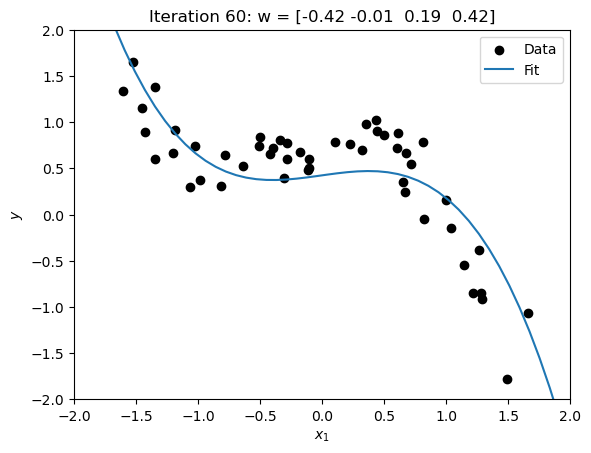

[[-0.42047663]
 [-0.01881088]
 [ 0.18773064]
 [ 0.42440536]]
[[-0.42154876]
 [-0.02330415]
 [ 0.18703334]
 [ 0.42490843]]
[[-0.42255434]
 [-0.02766929]
 [ 0.18637607]
 [ 0.42548925]]
[[-0.42349794]
 [-0.03191163]
 [ 0.18575611]
 [ 0.42614339]]
[[-0.42438381]
 [-0.03603626]
 [ 0.18517098]
 [ 0.42686661]]
[[-0.42521592]
 [-0.04004804]
 [ 0.18461833]
 [ 0.42765488]]
[[-0.4259979 ]
 [-0.04395163]
 [ 0.18409601]
 [ 0.42850438]]
[[-0.42673315]
 [-0.04775147]
 [ 0.18360201]
 [ 0.42941144]]
[[-0.42742484]
 [-0.05145181]
 [ 0.18313445]
 [ 0.43037259]]
[[-0.42807587]
 [-0.0550567 ]
 [ 0.18269161]
 [ 0.43138453]]
[[-0.42868896]
 [-0.05857002]
 [ 0.18227186]
 [ 0.4324441 ]]
[[-0.42926664]
 [-0.06199548]
 [ 0.1818737 ]
 [ 0.43354831]]
[[-0.42981125]
 [-0.06533661]
 [ 0.18149573]
 [ 0.43469431]]
[[-0.43032495]
 [-0.06859679]
 [ 0.18113665]
 [ 0.43587939]]
[[-0.43080978]
 [-0.07177925]
 [ 0.18079524]
 [ 0.43710096]]
[[-0.43126761]
 [-0.07488707]
 [ 0.18047038]
 [ 0.43835657]]
[[-0.43170019]
 [-0.0779

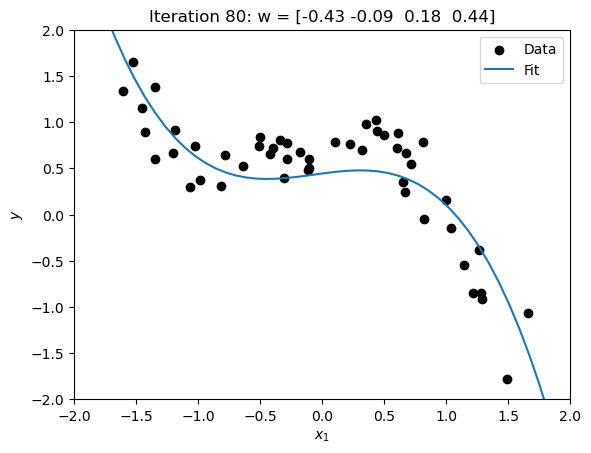

[[-0.43320888]
 [-0.08940524]
 [ 0.17905976]
 [ 0.44506765]]
[[-0.43353745]
 [-0.09212267]
 [ 0.17881438]
 [ 0.44648243]]
[[-0.43384898]
 [-0.09478351]
 [ 0.17857951]
 [ 0.44791717]]
[[-0.43414454]
 [-0.09738988]
 [ 0.1783545 ]
 [ 0.44937026]]
[[-0.4344251 ]
 [-0.09994383]
 [ 0.17813875]
 [ 0.45084013]]
[[-0.43469159]
 [-0.10244729]
 [ 0.17793169]
 [ 0.45232532]]
[[-0.43494487]
 [-0.10490215]
 [ 0.1777328 ]
 [ 0.45382444]]
[[-0.43518574]
 [-0.10731016]
 [ 0.17754159]
 [ 0.45533616]]
[[-0.43541494]
 [-0.10967302]
 [ 0.17735759]
 [ 0.45685924]]
[[-0.43563317]
 [-0.11199236]
 [ 0.17718037]
 [ 0.45839248]]
[[-0.43584108]
 [-0.11426973]
 [ 0.17700953]
 [ 0.45993476]]
[[-0.43603928]
 [-0.1165066 ]
 [ 0.1768447 ]
 [ 0.461485  ]]
[[-0.43622834]
 [-0.11870438]
 [ 0.17668551]
 [ 0.46304219]]
[[-0.43640878]
 [-0.12086443]
 [ 0.17653164]
 [ 0.46460538]]
[[-0.43658112]
 [-0.12298804]
 [ 0.17638279]
 [ 0.46617364]]
[[-0.4367458 ]
 [-0.12507644]
 [ 0.17623865]
 [ 0.46774613]]
[[-0.43690326]
 [-0.1271

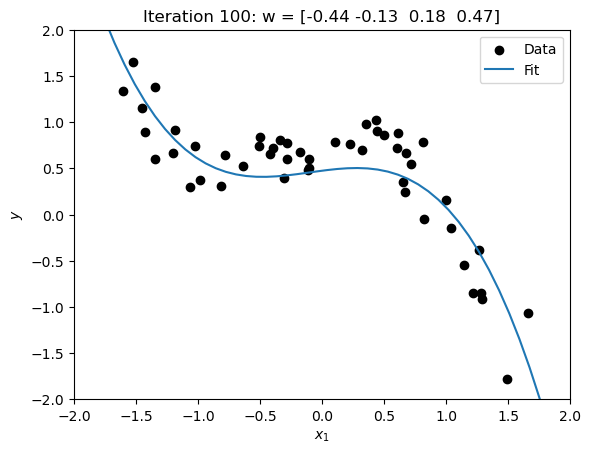

In [5]:
eta = 0.00025
for i in range(101):

    # YOUR CODE GOES HERE
    # Update w
    w = w - eta * grad(w) #Can not write as w -= eat * grad(w)
    print(w)
    if 0 == i%20:
        yreg = Xreg @ w
        plot_data_with_regression(x,y,xreg, yreg, f"Iteration {i}: w = {np.round(w.flatten(),2)}")